In [ ]:
# import needed packages

#the module 'sys' allows istalling module from inside Jupyter
import sys

import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install scikit-learn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.lda_model

import matplotlib.pyplot as plt
%matplotlib inline

#define text normalization function
%run ./Text_Normalization_Function.ipynb #defining text normalization function

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you ha

Exception: File `'./Text_Normalization_Function.ipynb.py'` not found.

In [ ]:
# read the data
reviews = pd.read_csv('ihpone_14_customer_reviews_english.csv')
reviews.head()

,title,rating,review,customer_name,dates,customer_location
0,Terrific,5.0,I bought iPhone 14 in big billion days. Very h...,Sathvick Kumaran,4 months ago,The Nilgiris District
1,Fabulous!,5.0,Best smart phone under this price range compar...,Rahul Prasad,"Jan, 2023",Debipur
2,Great product,5.0,Nice camera but battery drain fast specially o...,Tara singh mehra,11 months ago,Ramnagar
3,Great product,5.0,Damn such a great phone. Camera is really good...,Flipkart Customer,"Jan, 2023",Rajgarh
4,Terrific purchase,5.0,Thanku filipkart best phone in the world ❤️,Shivam kumar,"Jan, 2023",Etawah


### <font color=red> Step 2: Data Visualization

In [ ]:
# count the number of rows and columns in the data
rows, columns = reviews.shape
print("number of rows:",rows)
print('number of columns:',columns)

print('\n')

# count the number of null values and data type for each column
print('number of null values and data type for each column:')
print(reviews.info())

number of rows: 732
number of columns: 6


number of null values and data type for each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              732 non-null    object 
 1   rating             662 non-null    float64
 2   review             732 non-null    object 
 3   customer_name      732 non-null    object 
 4   dates              732 non-null    object 
 5   customer_location  732 non-null    object 
dtypes: float64(1), object(5)
memory usage: 34.4+ KB
None


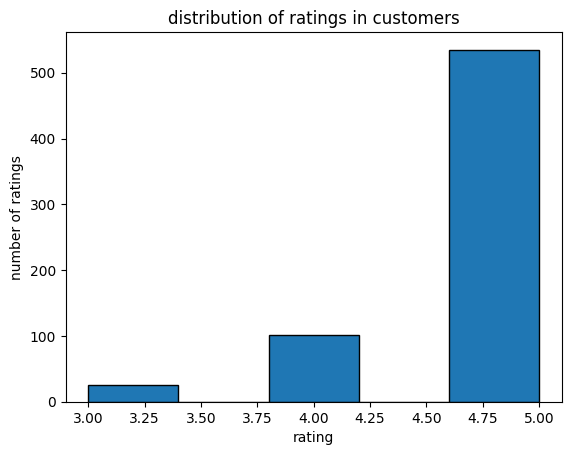

In [ ]:
# plot the distribution of ratings in customers
plt.hist(reviews['rating'],bins=5, edgecolor='black')
plt.title('distribution of ratings in customers')
plt.xlabel('rating')
plt.ylabel('number of ratings')
plt.show()

### **<font color=green> From the chart above, we found that most rating scores are between 4.25-5. No customer gave a rating below to 3. The chart shows obvious selection bias in the data and ratings are right skewed. We thought two reasons could explain the bias. One is that collectors of the data delete some negative comments before posting it. They wanted the iPhone 14 to look more attractive and persuaded more customers to buy it for business purposes. Another reason could be customers who are satisfied with iPhones have higher probability to purchase iPhones next time and give more positive comments. Customers who were unhappy with iPhones wouldn't purchase any more and wouldn't leave negative comments.**

### **<font color=green> Based on the rating distribution, we predicted that in our sentiment analysis, positive reviews are much more than negative reviews.**

In [ ]:
# transform reviews to list
reviews_corpus = reviews['review'].tolist()
reviews_corpus[:5]

['I bought iPhone 14 in big billion days. Very happy. Excellent Product deliveryExcellent hapticsExcellent PerformanceExcellent CameraExcellent In hand feelExcellent Eco System if u have other apple products❤️ From Ooty Thank you Flipkart for the big billion days 🎉',
 'Best smart phone under this price range compare to other phones in 2023 if you see overall build quality, performance and Camera with autofocus and video action mode are awesome50% extra RAM compared to iPhone 13 and other more features. Best time to upgrade to iPhone 14 . I am so happy See Low light photos are amazing..',
 'Nice camera but battery drain fast specially on video recording',
 'Damn such a great phone. Camera is really good, battery lasts long enough, super smooth even though its just 60 hz XDR display. Videos with action mode on are insanely stable and crisp.The night mode can take some really good shots jn low light conditions .The whole apple environment itself is so seamless. I shifted from android to i

In [ ]:
# normalize corpus
normalized_reviews_corpus = normalize_corpus(reviews_corpus)
normalized_reviews_corpus[:5]

['buy iphone big billion day happy excellent product deliveryexcellent hapticsexcellent performanceexcellent cameraexcellent hand feelexcellent eco system u apple product ooty thank flipkart big billion day',
 'best smart phone price range compare phone overall build quality performance camera autofocus video action mode awesome50 extra ram compare iphone feature best time upgrade iphone happy low light photo amaze',
 'nice camera battery drain fast specially video recording',
 'damn great phone camera really good battery last long enough super smooth even though hz xdr display video action mode insanely stable crisp night mode take really good shot jn low light condition whole apple environment seamless shift android iphone barely take time since ipad mac already click phone ready',
 'thanku filipkart best phone world']

## <font color=red> Step 3: Text Vectorization

In [ ]:
# we will use bag-of-words(BoW) method to do text vectorization for topic modeling
# BoW method is a baseline method, which is simple and fast to implement

# import vectorization packages
from sklearn.feature_extraction.text import CountVectorizer

# limit the number of feature
vectorizer_bow = CountVectorizer(max_features=450)

# vectorize the data
reviews_bow_matrix = vectorizer_bow.fit_transform(normalized_reviews_corpus).toarray()

pd.DataFrame(np.round(reviews_bow_matrix,2), columns = vectorizer_bow.get_feature_names_out())

,13pro,1st,5g,60hz,67k,70k,absolute,absolutely,action,actually,...,word,work,world,worst,worth,worthy,wow,write,year,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <font color=red> Step 4: Topic Modelling

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [ ]:
# Because of the sparity issue, we will use the Latent Dirichlet Allocation method to find 10 most frequent words for each topic
# we tunning the number of topics to find a good topic numbers
lda_reviews_corpus = LatentDirichletAllocation(n_components=4, max_iter=250,doc_topic_prior=0.9, topic_word_prior=0.9).fit(reviews_bow_matrix)

# find 10 most frequent words for each topic
num_top_words = 10
display_topics(lda_reviews_corpus, vectorizer_bow.get_feature_names_out(), num_top_words)

Topic 0:
product flipkart delivery happy nice mobile thank price exchange work
Topic 1:
good camera phone awesome quality performance love nice battery amazing
Topic 2:
use iphone battery issue phone day video low heat user
Topic 3:
iphone great best apple excellent display camera first android device


In [ ]:
# normalize word weights for each topic
word_weights = lda_reviews_corpus.components_ / lda_reviews_corpus.components_.sum(axis=1)[:, np.newaxis]
feature_names = vectorizer_bow.get_feature_names_out()

# rename topic names
topic_names = {
    0: "Delivery Service",
    1: "Camera",
    2: "Battery",
    3: "iPhone Brand"}

# show the weight for top 10 words in each topic
num_top_words = 10 # You need to define num_top_words
for topic_idx, topic_weights in enumerate(word_weights):
  print(f'\n Topic{topic_idx}:{topic_names.get(topic_idx,"Topic"+str(topic_idx))}')
  top_indices = topic_weights.argsort()[::-1][:num_top_words]
  for i in top_indices:
    print(f"{feature_names[i]}:{topic_weights[i]:.6f}")


 Topic0:Delivery Service
product:0.110331
flipkart:0.044206
delivery:0.026996
happy:0.022348
nice:0.022079
mobile:0.019479
thank:0.019350
price:0.016641
exchange:0.015258
work:0.014519

 Topic1:Camera
good:0.106413
camera:0.071105
phone:0.068691
awesome:0.048507
quality:0.046290
performance:0.039545
love:0.027562
nice:0.022990
battery:0.022748
amazing:0.018721

 Topic2:Battery
use:0.044401
iphone:0.039986
battery:0.034981
issue:0.017004
phone:0.015980
day:0.014948
video:0.013170
low:0.012673
heat:0.012394
user:0.011802

 Topic3:iPhone Brand
iphone:0.078788
great:0.039563
best:0.034678
apple:0.029477
excellent:0.022353
display:0.019432
camera:0.017911
first:0.017644
android:0.016716
device:0.015175


Topic 0, Delivery Service: product flipkart delivery happy nice mobile thank price exchange work
Topic 1, Camera: good camera phone awesome quality performance love nice battery amazing
Topic 2, Battery: use iphone battery issue phone day video low heat user
Topic 3, iPhone Brand: iphone great best apple excellent display camera first android device

### **<font color=green> Based on the selected features of each topics, we name the four topics "Delivery Service", "Camera", "Battery", "iPhone Brand" separately.**

### <font color=red> Step 5: Sentiment Analysis

In [ ]:
# we use TF-IDF to do text vectorization for sentiment analysis
# TF-IDF helps emphasize important, topic-specific terms

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_TF_IDF = TfidfVectorizer(norm='l2', ngram_range=(1,2), max_features=450,smooth_idf=True)

TF_IDF_matrix = vectorizer_TF_IDF.fit_transform(normalized_reviews_corpus).toarray()
pd.DataFrame(np.round(TF_IDF_matrix,2),columns=vectorizer_TF_IDF.get_feature_names_out())

,1st,5g,60hz,absolutely,action,action mode,already,always,amaze,amaze phone,...,work,work properly,world,worst,worth,worthy,wow,write review,year,year use
0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.17,0.18,0.00,0.0,0.14,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.14,0.15,0.16,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# we use VADER Lexicon-Based Sentiment Analysis method
# import sentiment analysis packages
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# assign topic to reviews vectorized through TF-IDF method
doc_topics = lda_reviews_corpus.transform(TF_IDF_matrix)
doc_topic_labels = np.argmax(doc_topics, axis=1)

# compute VADER scores for reviews
sentiment_scores = []
for doc in normalized_reviews_corpus:
    score = analyzer.polarity_scores(doc)['compound']
    sentiment_scores.append(score)

df = pd.DataFrame({
    'review': normalized_reviews_corpus,
    'topic': doc_topic_labels,
    'sentiment_score': sentiment_scores
})

# define positive or negative for reviews
def label_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# store sentiment labels to dataframe
df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# rename topic names
df['topic_name'] = df['topic'].map(topic_names)

# Summary sentiment distribution for each topic
topic_sentiment_summary = df.groupby('topic_name')['sentiment_label'].value_counts(normalize=True).unstack().fillna(0)
print(topic_sentiment_summary)

sentiment_label   negative   neutral  positive
topic_name                                    
Battery           0.060060  0.114114  0.825826
Camera            0.050000  0.137500  0.812500
Delivery Service  0.040936  0.169591  0.789474
iPhone Brand      0.101351  0.040541  0.858108


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text(0, 0.5, 'Topic')

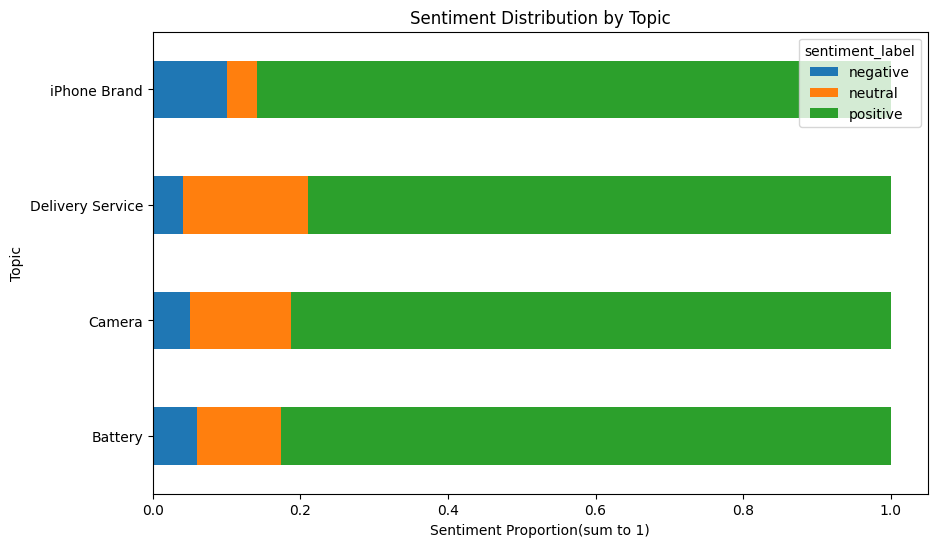

In [ ]:
# plot sentiment distribution chart by topic
topic_sentiment_distribution = topic_sentiment_summary.plot(kind='barh', stacked=True, figsize=(10,6), title="Sentiment Distribution by Topic")
topic_sentiment_distribution.set_xlabel('Sentiment Proportion(sum to 1)')
topic_sentiment_distribution.set_ylabel('Topic')

### <font color=red> Step 6: Conclusion

### **<font color=green> Customer reviews of iPhone 14 mainly focus on delivery service, camera, battery and brand comparison between Apple and android. iPhone 14 mainly receives positive reviews in these aspects. Meanwhile, considering negative reviews are little, it's probably that the dataset contains selection bias. The dataset may prefer positive reviews when collecting reviews from customers. Another possible reason is that customers who are satisfied with the iPhone 14 are more likely to leave reviews.**

<font color=red>